In [69]:
# Date: 18/January/2023 - Wednesday
# Author: Virgilio Murillo Ochoa
# personal github: Virgilio-AI
# linkedin: https://www.linkedin.com/in/virgilio-murillo-ochoa-b29b59203
# contact: data_scientist@virgiliomurillo.com
# web: virgiliomurillo.com

In [70]:

from numpy.random import randint
import numpy as np # for importing numpy
import pandas as pd # for importing pandas
import random
import gc
import os
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# for ilustration purposes, we use a trainig set with 1000 saples taken from "A study of the relationships of the brain to the size of the head" -R J 
# the set contains the following features:
# gender (1 = male, 2 = female )
# age range ( 1 = 20-46,2 = 46 + )
# headsize cm3

training_set = pd.read_csv('data/brainhead.csv')
training_set.describe()

,gender,agerange,headsize,brainweight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


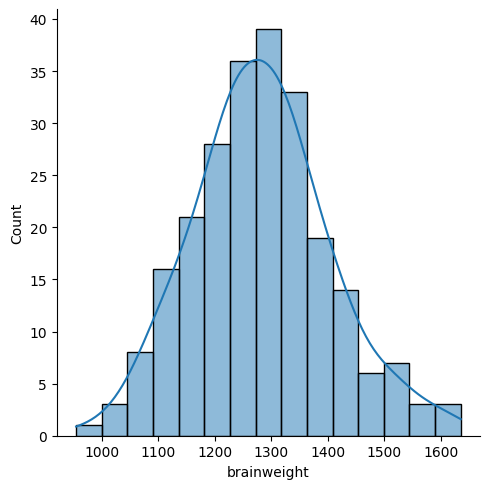

In [72]:
# plot the distribution of the brain weights
sns.displot(training_set.brainweight,kde = True)
plt.show()

In [73]:
features = training_set[['gender','agerange','headsize']]
observations = training_set['brainweight']
mu = features.mean()
sigma = features.std()

features_norm = (features - mu ) / sigma
features_norm.head()

,gender,agerange,headsize
0,-0.874879,-1.072228,2.403781
1,-0.874879,-1.072228,0.284751
2,-0.874879,-1.072228,1.716602
3,-0.874879,-1.072228,0.391524
4,-0.874879,-1.072228,1.486630


In [74]:
# add a constant feature x0 with value 1
m = len(features_norm)
features_norm['x0'] = pd.Series(np.ones(m))
n = features_norm.columns.size
features_norm.head()

,gender,agerange,headsize,x0
0,-0.874879,-1.072228,2.403781,1.0
1,-0.874879,-1.072228,0.284751,1.0
2,-0.874879,-1.072228,1.716602,1.0
3,-0.874879,-1.072228,0.391524,1.0
4,-0.874879,-1.072228,1.486630,1.0


In [75]:
# set the initial alpha and number of iterations
alpha = 0.25
iterations = 150
m = len(observations) * 1.0

# initialize the theta values to 0
thetas = np.zeros(len(features_norm.columns))
thetas

array([0., 0., 0., 0.])

In [76]:
# calculate theta's by performing gradient descent
features_norm = np.array(features_norm)
observations = np.array(observations)
features_norm, observations

(array([[-0.8748791 , -1.0722285 ,  2.40378092,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.28475068,  1.        ],
        [-0.8748791 , -1.0722285 ,  1.71660186,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.39152352,  1.        ],
        [-0.8748791 , -1.0722285 ,  1.48662959,  1.        ],
        [-0.8748791 , -1.0722285 , -0.13412739,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.41342564,  1.        ],
        [-0.8748791 , -1.0722285 , -0.20530928,  1.        ],
        [-0.8748791 , -1.0722285 , -0.05746997,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.95276538,  1.        ],
        [-0.8748791 , -1.0722285 , -0.52289004,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.9828808 ,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.01644969,  1.        ],
        [-0.8748791 , -1.0722285 ,  1.57150031,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.54210061,  1.        ],
        [-0.8748791 , -1.0722285 ,  0.66256227,  1.        ],
        

In [77]:

cost_history = []

for i in range(iterations):
	# calculate the predicted values
	predicted = np.dot(features_norm, thetas)

	# calculate the thetas for this iteration
	thetas = thetas - alpha * (1.0/m) * np.dot((predicted - observations), features_norm)

	# calculate the cost
	sum_of_square_errors = np.square(predicted - observations).sum()
	cost = sum_of_square_errors / (2 * m )

	# append cost history
	cost_history.append(cost)


thetas

array([ -11.19843822,  -11.97865076,   89.20113027, 1282.87341772])

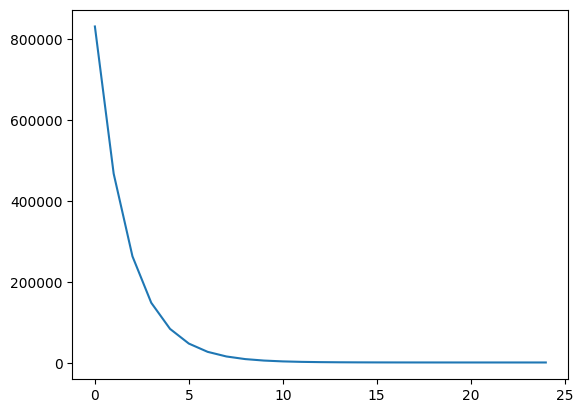

In [78]:
# Plot the last 25 entries of the cost history  
plt.plot(cost_history[:25])
plt.show()

In [79]:
# Calculate the predicted brainweights and differences from the observed values
training_set['predictions'] = np.dot(features_norm, thetas)
training_set['difference'] = training_set['predictions'] - training_set['brainweight']
training_set.head()

,gender,agerange,headsize,brainweight,predictions,difference
0,1,1,4512,1530,1519.934523,-10.065477
1,1,1,3738,1297,1330.914631,33.914631
2,1,1,4261,1335,1458.637375,123.637375
3,1,1,3777,1282,1340.438889,58.438889
4,1,1,4177,1590,1438.123588,-151.876412


In [80]:
# Calculate the predicted brainweights and differences from the observed values
training_set['predictions'] = np.dot(features_norm, thetas)
training_set['difference'] = training_set['predictions'] - training_set['brainweight']
training_set.head()

,gender,agerange,headsize,brainweight,predictions,difference
0,1,1,4512,1530,1519.934523,-10.065477
1,1,1,3738,1297,1330.914631,33.914631
2,1,1,4261,1335,1458.637375,123.637375
3,1,1,3777,1282,1340.438889,58.438889
4,1,1,4177,1590,1438.123588,-151.876412


In [81]:
# Plot the residuals
p = sns.residplot(training_set.predictions, training_set.brainweight)
plt.show()

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
# Calculate the coefficient of determination (r^2)
y = np.array(training_set.brainweight)
p = np.array(training_set.predictions)
xbar = np.mean(y)

r_squared = 1 - np.square(y - p).sum() / np.square(y - xbar).sum()
r_squared